# Prediction of Most Valuable player in NBA Match

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

### Reading the Datasets

In [2]:
dfh = pd.read_csv('Historical_MVPdata.csv')
dfc = pd.read_csv('CurrentMVP.csv')

### Exploring Data

In [3]:
dfh.shape

(408, 27)

In [4]:
dfc.shape

(10, 25)

The historical_MPVdata.csv contains 408 rows and 27 columns whereas, the CurrentMVP.csv contains 10 rows and 25 columns.

In [7]:
dfh.head() #check the first 5 entries in the dataset

,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,3P%,FT%,WS,WS/48,VORP,BPM,G-Lockout,Wins-Lockout,WS-Lockout,VORP-Lockout
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,221,0.665,82.0,60.0,2,...,0.000,0.765,14.8,0.227,6.8,6.7,NaN,NaN,NaN,NaN
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,0.200,0.787,12.5,0.213,6.5,7.2,NaN,NaN,NaN,NaN
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,0.314,0.852,10.6,0.173,3.1,2.2,NaN,NaN,NaN,NaN
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,0.406,0.836,11.2,0.182,5.4,5.3,NaN,NaN,NaN,NaN
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,0.222,0.830,8.9,0.148,1.5,0.0,NaN,NaN,NaN,NaN


In [8]:
dfc.head() #check the first 5 entries in the dataset

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games
0,1,Nikola Jokić,26,DEN,82.000000,48.809524,8,35.8,27.1,11.2,...,0.866,18.938095,0.310,10.347619,11.9,42,25,9.7,5.3,42
1,2,Joel Embiid,27,PHI,59.116279,57.209302,1,32.6,29.9,11.5,...,0.859,11.823256,0.294,5.148837,8.6,31,30,6.2,2.7,43
2,3,Giannis Antetokounmpo,26,MIL,80.000000,54.000000,7,34.2,29.0,11.7,...,0.679,14.200000,0.250,13.200000,11.5,40,27,7.1,6.6,41
3,4,James Harden,31,BRK,70.558140,55.302326,3,37.9,25.3,8.0,...,0.866,11.823256,0.211,5.720930,6.5,37,29,6.2,3.0,43
4,5,Damian Lillard,30,POR,80.047619,48.809524,9,36.0,30.3,4.4,...,0.940,13.080952,0.217,6.052381,6.3,41,25,6.7,3.1,42


In [9]:
dfh.describe()

,Rank,Age,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,MP,PTS,...,3P%,FT%,WS,WS/48,VORP,BPM,G-Lockout,Wins-Lockout,WS-Lockout,VORP-Lockout
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.00000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,20.000000,20.000000,20.000000,20.000000
mean,5.446078,27.299020,268.748529,1043.796569,0.254164,76.610793,53.653289,6.078431,36.94951,23.764461,...,0.259233,0.778988,12.249833,0.206831,5.494054,5.650735,53.000000,35.200000,8.145000,3.435000
std,2.834854,3.522312,324.014148,227.478261,0.292090,6.219986,7.468348,4.654524,2.54087,4.682918,...,0.136239,0.094596,2.930865,0.043229,2.032271,2.607653,6.382542,8.003946,2.673156,1.460452
min,1.000000,19.000000,1.000000,221.000000,0.002000,44.000000,24.000000,1.000000,28.00000,6.900000,...,0.000000,0.423000,5.100000,0.078000,0.500000,-1.300000,42.000000,25.000000,3.600000,0.700000
25%,3.000000,25.000000,30.750000,920.000000,0.029750,74.000000,49.000000,2.750000,35.37500,20.900000,...,0.191250,0.734750,10.200000,0.177750,4.067047,4.000000,49.000000,27.750000,6.875000,2.850000
50%,5.000000,27.000000,106.000000,1130.000000,0.108500,79.000000,55.000000,5.000000,37.20000,23.900000,...,0.302500,0.787000,11.923188,0.204000,5.300000,5.400000,50.000000,35.000000,7.700000,3.450000
75%,8.000000,30.000000,428.500000,1230.000000,0.404500,81.000000,58.098485,9.000000,38.60000,27.025000,...,0.361250,0.848000,14.000000,0.234250,6.700000,7.400000,58.500000,40.250000,9.150000,3.875000
max,10.000000,38.000000,1310.000000,1310.000000,1.000000,82.000000,73.000000,24.000000,43.70000,37.100000,...,0.500000,0.948000,21.200000,0.322000,12.400000,15.600000,66.000000,50.000000,14.500000,7.600000


In [10]:
dfc.describe()

,Rank,Age,G,Team Wins,Overall Seed,MP,PTS,TRB,AST,STL,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,5.50000,28.300000,73.376855,52.831672,5.400000,34.690000,26.450000,8.770000,6.600000,1.150000,...,0.802000,12.236788,0.231000,6.554419,7.500000,37.700000,27.200000,6.29000,3.360000,42.200000
std,3.02765,3.683296,8.979960,4.673778,3.306559,1.928413,4.603199,3.104853,2.913951,0.340751,...,0.112101,2.800247,0.042311,3.018373,2.652881,4.137901,2.573368,1.40748,1.498295,0.918937
min,1.00000,22.000000,59.116279,44.000000,1.000000,31.000000,14.400000,4.400000,1.300000,0.500000,...,0.596000,8.581395,0.181000,3.600000,3.500000,31.000000,22.000000,4.50000,1.800000,41.000000
25%,3.25000,26.250000,67.697674,49.479236,3.000000,33.975000,25.550000,6.700000,5.100000,1.000000,...,0.714750,10.965116,0.202000,4.862791,6.300000,35.500000,25.500000,5.72500,2.550000,41.250000
50%,5.50000,28.000000,77.093023,53.697674,5.000000,34.950000,27.600000,8.200000,7.000000,1.200000,...,0.862500,11.711628,0.218500,5.886656,7.100000,39.000000,27.500000,6.05000,3.050000,42.500000
75%,7.75000,29.750000,80.035714,55.302326,7.750000,35.750000,29.000000,11.425000,8.425000,1.200000,...,0.869000,12.766528,0.245750,6.570930,8.400000,41.000000,29.000000,6.57500,3.375000,43.000000
max,10.00000,36.000000,82.000000,60.000000,11.000000,37.900000,30.300000,13.500000,11.100000,1.700000,...,0.940000,18.938095,0.310000,13.200000,11.900000,42.000000,30.000000,9.70000,6.600000,43.000000


### Data Preprocessing

In [11]:
dfh.isnull().sum() #check the null values

Rank              0
Player            0
Age               0
Tm                0
Pts Won           0
Pts Max           0
Share             0
G                 0
Team Wins         0
Overall Seed      0
MP                0
PTS               0
TRB               0
AST               0
STL               0
BLK               0
FG%               0
3P%               0
FT%               0
WS                0
WS/48             0
VORP              0
BPM               0
G-Lockout       388
Wins-Lockout    388
WS-Lockout      388
VORP-Lockout    388
dtype: int64

In [12]:
dfc.isnull().sum() #check the null values

Rank               0
Player             0
Age                0
Tm                 0
G                  0
Team Wins          0
Overall Seed       0
MP                 0
PTS                0
TRB                0
AST                0
STL                0
BLK                0
FG%                0
3P%                0
FT%                0
WS                 0
WS/48              0
VORP               0
BPM                0
G-Unadjusted       0
Wins-Unadjusted    0
WS-Unadjusted      0
VORP-Unadjusted    0
Total Games        0
dtype: int64

The historical_MPVdata.csv contains null values whereas, the CurrentMVP.csv contains no null values.

In [13]:
dfh.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'Pts Won', 'Pts Max', 'Share', 'G',
       'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK',
       'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM', 'G-Lockout',
       'Wins-Lockout', 'WS-Lockout', 'VORP-Lockout'],
      dtype='object')

<AxesSubplot:>

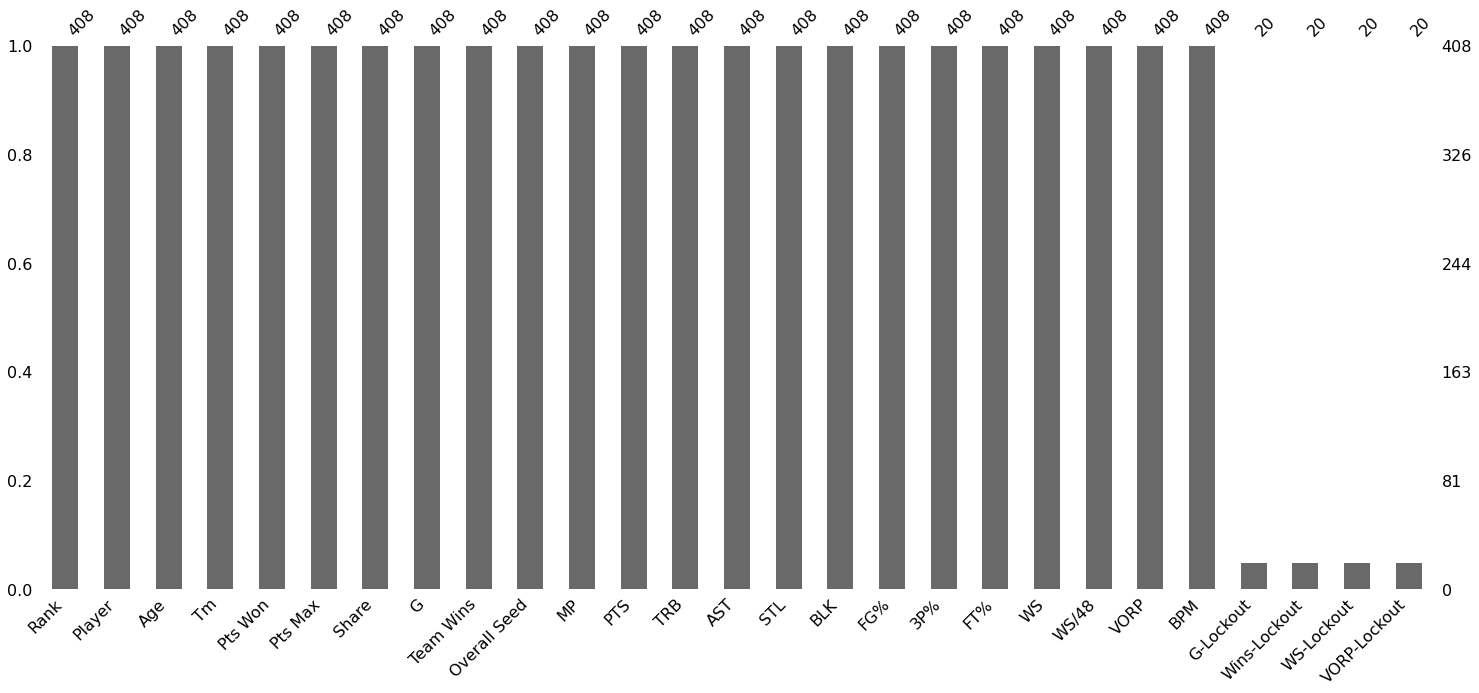

In [14]:
msno.bar(dfh) #graph to display number of null values

<AxesSubplot:>

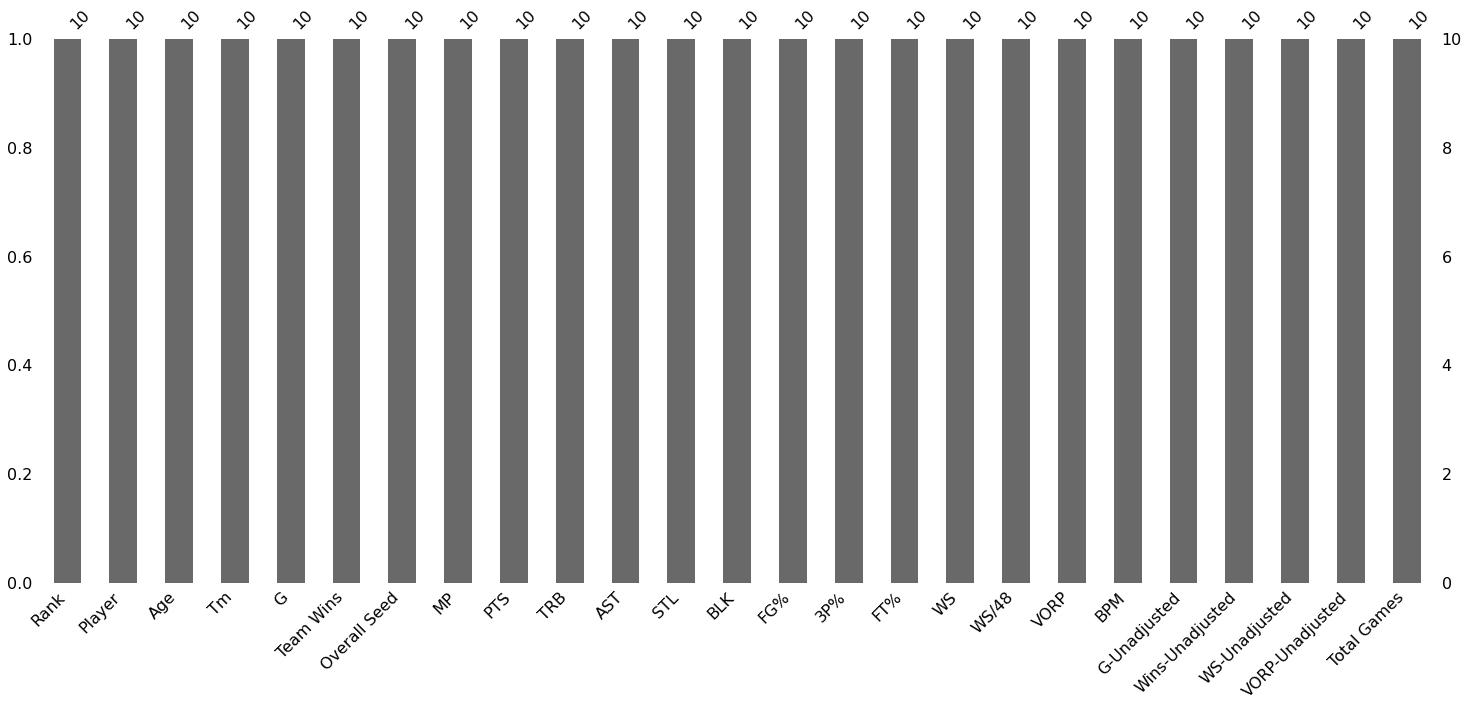

In [15]:
msno.bar(dfc) #graph to display number of null values

### Data Viusalisation

Text(0.5, 1.0, 'Heatmap for Historical_MVPdata.csv Dataset')

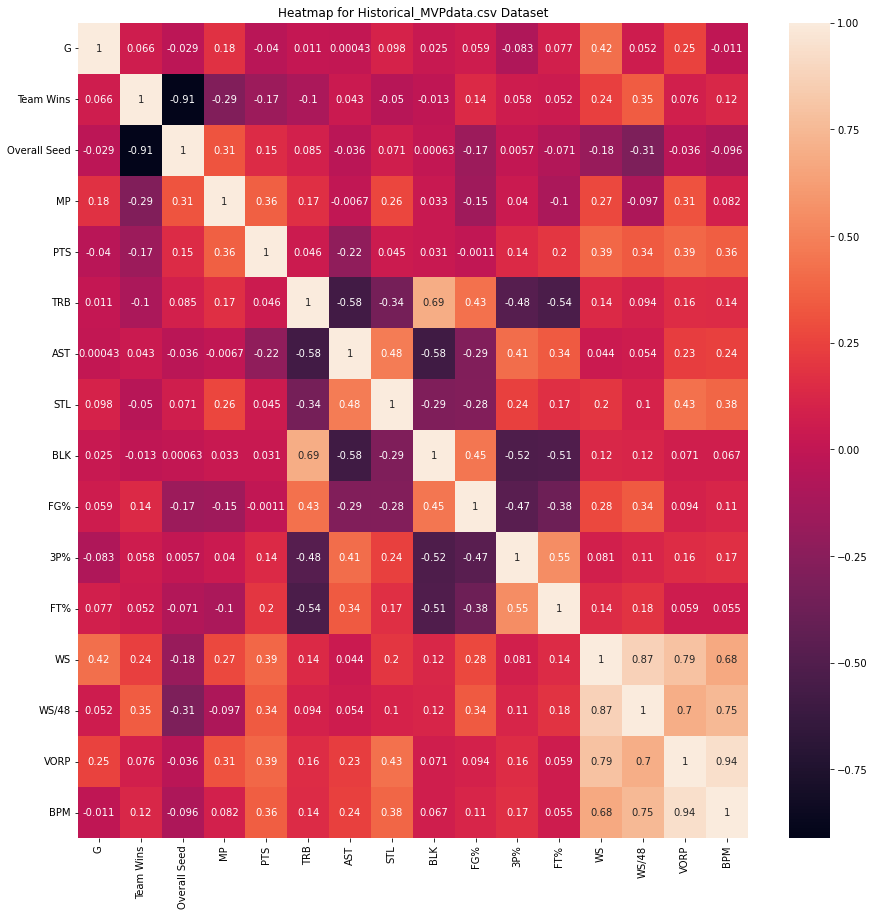

In [16]:
h = dfh[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL','BLK', 'FG%', '3P%','FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
p = plt.figure(figsize=(15, 15))
p.set_facecolor('white')
sns.heatmap(h.corr(), annot = True)
plt.title("Heatmap for Historical_MVPdata.csv Dataset")

### Building Machine learning model

In [17]:
# Import the required libraries
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

In [18]:
#Create the trainig and testing data
train, test = train_test_split(dfh, test_size = 0.25, random_state = 10)
xtrain = train[['3P%', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]
xtest = test[['BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]

In [19]:
#function for training using different algorithms
def scores(y, model):
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    print("Mean squared error: " % mean_squared_error(ytest, y_pred))
    print('R2 score: ' % r2_score(ytest, y_pred))
    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    for i in y_pred:
        y.append(i)

In [20]:
#Applying Linear Regression Algorithm
regr = LinearRegression()
y_regr = []
scores(y_regr,regr)

Mean squared error: 
R2 score: 
R2 cross validation score: 0.63 (+/- 0.06)


In [21]:
#Applying KNN Regressor Algorithm
knn = neighbors.KNeighborsRegressor(n_neighbors = 9, weights = 'uniform')
y_knn = []
scores(y_knn, knn)

Mean squared error: 
R2 score: 
R2 cross validation score: 0.63 (+/- 0.01)


In [22]:
#Applying Random Forest Regressor Algorithm
rf = RandomForestRegressor(random_state = 200, n_estimators = 100, criterion = 'mse')
y_rf = []
scores(y_rf, rf)

Mean squared error: 
R2 score: 
R2 cross validation score: 0.55 (+/- 0.14)


In [23]:
#Applying MLP Regressor Algorithm
dnn = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes=100, max_iter=10000, random_state=10, activation='identity', learning_rate ='invscaling')
y_dnn = []
scores(y_dnn, dnn)

Mean squared error: 
R2 score: 
R2 cross validation score: 0.62 (+/- 0.05)


### Predictions

In [24]:
#Creating data for Predictions
dfCurrentNames = dfc.iloc[:, 1]
dfCurrentPredict = dfc[['BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
dfc.head()

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games
0,1,Nikola Jokić,26,DEN,82.000000,48.809524,8,35.8,27.1,11.2,...,0.866,18.938095,0.310,10.347619,11.9,42,25,9.7,5.3,42
1,2,Joel Embiid,27,PHI,59.116279,57.209302,1,32.6,29.9,11.5,...,0.859,11.823256,0.294,5.148837,8.6,31,30,6.2,2.7,43
2,3,Giannis Antetokounmpo,26,MIL,80.000000,54.000000,7,34.2,29.0,11.7,...,0.679,14.200000,0.250,13.200000,11.5,40,27,7.1,6.6,41
3,4,James Harden,31,BRK,70.558140,55.302326,3,37.9,25.3,8.0,...,0.866,11.823256,0.211,5.720930,6.5,37,29,6.2,3.0,43
4,5,Damian Lillard,30,POR,80.047619,48.809524,9,36.0,30.3,4.4,...,0.940,13.080952,0.217,6.052381,6.3,41,25,6.7,3.1,42


In [25]:
#Predicting with Linear Regression Model
LRpredict = regr.predict(dfCurrentPredict)
LRpredict = LRpredict.tolist()
for (i, j) in zip(dfCurrentNames, LRpredict):
    print(i, j)

Nikola Jokić 0.6117299736347288
Joel Embiid 0.19302720254283712
Giannis Antetokounmpo 0.38627513634789623
James Harden 0.3903643040490449
Damian Lillard 0.4261969350493482
LeBron James 0.29693066147911085
Luka Dončić 0.24714846105409083
Kawhi Leonard 0.13181532960727083
Kyrie Irving 0.10797469947799038
Rudy Gobert -0.5724346536982018


In [26]:
#Predicting with KNN Regressor Model
knnPredict = knn.predict(dfCurrentPredict)
knnPredict = knnPredict.tolist()
for (i, j) in zip(dfCurrentNames, knnPredict):
    print(i, j)

Nikola Jokić 0.4945555555555555
Joel Embiid 0.49877777777777776
Giannis Antetokounmpo 0.5055555555555555
James Harden 0.41144444444444445
Damian Lillard 0.20900000000000002
LeBron James 0.21433333333333335
Luka Dončić 0.17066666666666666
Kawhi Leonard 0.12166666666666666
Kyrie Irving 0.1771111111111111
Rudy Gobert 0.08211111111111111


In [27]:
#Predicting Random Forest Regressor Model
rfPredict = rf.predict(dfCurrentPredict)
rfPredict = rfPredict.tolist()
for (i, j) in zip(dfCurrentNames, rfPredict):
    print(i, j)

Nikola Jokić 0.6240700000000001
Joel Embiid 0.27912
Giannis Antetokounmpo 0.5622200000000004
James Harden 0.38999
Damian Lillard 0.24781999999999993
LeBron James 0.21660999999999977
Luka Dončić 0.21840000000000004
Kawhi Leonard 0.12944000000000003
Kyrie Irving 0.17586999999999997
Rudy Gobert 0.39166000000000006


In [28]:
#Predicting with MLP Regressor Model
dnnPredict = dnn.predict(dfCurrentPredict)
dnnPredict = dnnPredict.tolist()
for (i, j) in zip(dfCurrentNames, dnnPredict):
    print(i, j)

Nikola Jokić 0.6115555744658286
Joel Embiid 0.1928467791500269
Giannis Antetokounmpo 0.3851700991218595
James Harden 0.39059179959333024
Damian Lillard 0.42616350048645735
LeBron James 0.29669271946936904
Luka Dončić 0.24709338785128476
Kawhi Leonard 0.13169554431965114
Kyrie Irving 0.10772688783018082
Rudy Gobert -0.5733460958700675


### Saving the Model

In [ ]:
import pickle
filename = 'model.pkl'
pickle_out = open(filename, 'wb')
pickle.dump(n, pickle_out)
pickle_out.close()